In [1]:
import pandas as pd
import dabest
import matplotlib.pyplot as plt
import matplotlib as mpl
%config InlineBackend.figure_format = 'svg' #'retina' 
import numpy as np
import dabest

print("We're using DABEST v{}".format(dabest.__version__))

Bad val 'qt5' on line #1
	"backend: qt5
"
	in file "/Users/hunglo/.matplotlib/matplotlibrc"
	Key backend: Unrecognized backend string 'qt5': valid strings are ['GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg', 'Qt4Agg', 'Qt4Cairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']


We're using DABEST v0.2.4


In [2]:
# Load dataframe for AUC
file_name = '/Users/hunglo/Desktop/DS_csv/AUC_all.csv'
Df = pd.read_csv(file_name)

Df_dabest = dabest.load(data=Df,
                        idx=(("2a_ACSF","2a_APV"),("2b_ACSF","2b_APV")),
                        paired=True, id_col='ID')
Df.head()

,ID,2b_ACSF,2b_APV,2a_ACSF,2a_APV
0,1,1.126426,0.235333,0.710147,0.503847
1,2,1.037440,0.439577,0.896692,0.627437
2,3,0.972209,0.740521,0.229651,0.270299
3,4,0.763207,0.376310,0.624539,0.659798
4,5,0.891100,0.523153,0.307899,0.310813


This is how my dataframe looks like. (this is markdown)

|    |   ID |   2b_ACSF |   2b_APV |   2a_ACSF |   2a_APV |
|---:|-----:|----------:|---------:|----------:|---------:|
|  0 |    1 |  1.12643  | 0.235333 |  0.710147 | 0.503847 |
|  1 |    2 |  1.03744  | 0.439577 |  0.896692 | 0.627437 |
|  2 |    3 |  0.972209 | 0.740521 |  0.229651 | 0.270299 |
|  3 |    4 |  0.763207 | 0.37631  |  0.624539 | 0.659798 |
|  4 |    5 |  0.8911   | 0.523153 |  0.307899 | 0.310813 |

In [3]:
Df_dabest.mean_diff.results

/Users/hunglo/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/Users/hunglo/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,control,test,effect_size,is_paired,difference,ci,bca_low,bca_high,bca_interval_idx,pct_low,pct_high,pct_interval_idx,bootstraps,resamples,random_seed,pvalue_wilcoxon,statistic_wilcoxon,pvalue_paired_students_t,statistic_paired_students_t
0,2a_ACSF,2a_APV,mean difference,True,-0.079347,95,-0.359939,0.162577,"(87, 4831)",-0.344444,0.181068,"(125, 4875)","[-0.55575646, -0.52616852, -0.5193633200000001...",5000,12345,0.685830,6.0,0.294050,1.206644
1,2b_ACSF,2b_APV,mean difference,True,-0.495098,95,-0.687718,-0.321517,"(79, 4822)",-0.671427,-0.307714,"(125, 4875)","[-0.7864543599999999, -0.7864543599999998, -0....",5000,12345,0.043114,0.0,0.012604,4.304126


In [4]:
Df_dabest.mean_diff.statistical_tests.to_csv('/Users/hunglo/Desktop/DS_csv/'+file_name[29:-4]+'_stats.csv')
Df_dabest.mean_diff.statistical_tests

,control,test,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_wilcoxon,statistic_wilcoxon,pvalue_paired_students_t,statistic_paired_students_t
0,2a_ACSF,2a_APV,mean difference,True,-0.079347,95,-0.359939,0.162577,0.685830,6.0,0.294050,1.206644
1,2b_ACSF,2b_APV,mean difference,True,-0.495098,95,-0.687718,-0.321517,0.043114,0.0,0.012604,4.304126


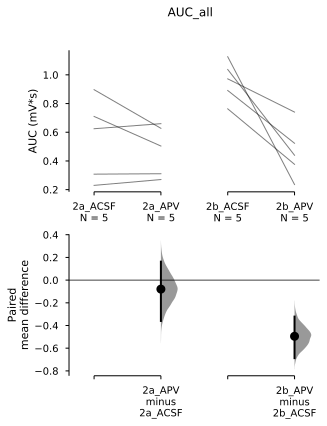

In [5]:
# Produce a Cumming estimation plot for AUC.

plt.style.use('seaborn-notebook')

if file_name=='/Users/hunglo/Desktop/DS_csv/AUC_all.csv':
    swarm_label='AUC (mV*s)'
else:
    swarm_label='Amplitude (mV)'

fig = Df_dabest.mean_diff.plot(swarm_label=swarm_label, custom_palette="Paired",
                               show_pairs=True, swarmplot_kwargs= {'size':6})

fig.suptitle(file_name[29:-4])

plt.savefig('/Users/hunglo/Desktop/DS_csv/'+file_name[29:-4]+'.pdf',pdi=600,bbox_inches='tight')

In [6]:
# Load dataframe for Amp
file_name = '/Users/hunglo/Desktop/DS_csv/Amp_all.csv'

Df = pd.read_csv(file_name)
Df_dabest = dabest.load(data=Df,
                        idx=(("2a_ACSF","2a_APV"),("2b_ACSF","2b_APV")),
                        paired=True, id_col='ID')
Df.head()

,ID,2b_ACSF,2b_APV,2a_ACSF,2a_APV
0,1,19.63997,6.955800,17.754640,15.715040
1,2,18.37767,9.532212,18.992750,14.582700
2,3,18.85710,15.413370,6.450392,7.607287
3,4,15.58707,8.833228,14.978270,17.548220
4,5,16.39175,11.882660,9.595123,11.357830


This is how Amplitude dataframe looks like (markdown).

|    |   ID |   2b_ACSF |   2b_APV |   2a_ACSF |   2a_APV |
|---:|-----:|----------:|---------:|----------:|---------:|
|  0 |    1 |   19.64   |  6.9558  |  17.7546  | 15.715   |
|  1 |    2 |   18.3777 |  9.53221 |  18.9928  | 14.5827  |
|  2 |    3 |   18.8571 | 15.4134  |   6.45039 |  7.60729 |
|  3 |    4 |   15.5871 |  8.83323 |  14.9783  | 17.5482  |
|  4 |    5 |   16.3917 | 11.8827  |   9.59512 | 11.3578  |

In [7]:
Df_dabest.mean_diff.results

/Users/hunglo/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/Users/hunglo/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,control,test,effect_size,is_paired,difference,ci,bca_low,bca_high,bca_interval_idx,pct_low,pct_high,pct_interval_idx,bootstraps,resamples,random_seed,pvalue_wilcoxon,statistic_wilcoxon,pvalue_paired_students_t,statistic_paired_students_t
0,2a_ACSF,2a_APV,mean difference,True,-0.192020,95,-5.765307,4.719745,"(84, 4828)",-5.449139,5.130290,"(125, 4875)","[-9.284427, -9.082349800000001, -8.83472780000...",5000,12345,0.892738,7.0,0.890794,0.146256
1,2b_ACSF,2b_APV,mean difference,True,-7.247258,95,-10.166036,-4.340124,"(105, 4855)",-10.047170,-4.235354,"(125, 4875)","[-11.8389624, -11.743076400000001, -11.3508196...",5000,12345,0.043114,0.0,0.011714,4.397445


In [8]:
Df_dabest.mean_diff.statistical_tests.to_csv('/Users/hunglo/Desktop/DS_csv/'+file_name[29:-4]+'_stats.csv')
Df_dabest.mean_diff.statistical_tests

,control,test,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_wilcoxon,statistic_wilcoxon,pvalue_paired_students_t,statistic_paired_students_t
0,2a_ACSF,2a_APV,mean difference,True,-0.192020,95,-5.765307,4.719745,0.892738,7.0,0.890794,0.146256
1,2b_ACSF,2b_APV,mean difference,True,-7.247258,95,-10.166036,-4.340124,0.043114,0.0,0.011714,4.397445


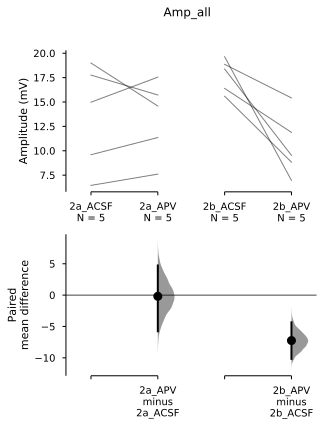

In [9]:
# Produce a Cumming estimation plot for Amplitude.

plt.style.use('seaborn-notebook')

if file_name=='/Users/hunglo/Desktop/DS_csv/AUC_all.csv':
    swarm_label='AUC (mV*s)'
else:
    swarm_label='Amplitude (mV)'

fig = Df_dabest.mean_diff.plot(swarm_label=swarm_label, custom_palette="Paired",
                               show_pairs=True, swarmplot_kwargs= {'size':6})

fig.suptitle(file_name[29:-4])

plt.savefig('/Users/hunglo/Desktop/DS_csv/'+file_name[29:-4]+'.pdf',pdi=600,bbox_inches='tight')